- ## Downside Analysis

In [69]:
import pandas as pd
import edhec_risk_kit as erk
hfi = erk.get_hfi_returns()

In [70]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- ### Semideviation

In [71]:
hfi.std(ddof = 0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [72]:
semi_deviation = erk.semideviation(hfi)

 ## VaR and CVaR
 

- ### Historic Value at Risk

In [73]:
import numpy as np

In [74]:
np.percentile(hfi, 5, axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [75]:
def var_historic(r, level = 5):
    '''
    VaR Historic
    '''
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level = level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")


In [76]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

- ### Parametric Gaussian Model for Value at Risk

In [77]:
z = norm.ppf(0.05)
z

-1.6448536269514729

In [78]:
def var_gaussian(r,level = 5):
    '''
    Returns the Parametric Gaussian VaR of a Series or a DataFrame
    '''
    from scipy.stats import norm
    z = norm.ppf(level / 100)
    var = -(r.mean() + r.std(ddof = 0) * z)
    return var
    


In [79]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

- ### Modified Cornish - Fisher Model

In [80]:
erk.var_gaussian(hfi,modified = True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

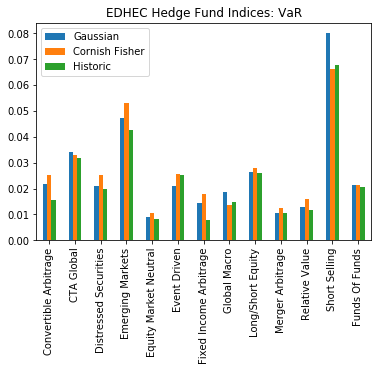

In [81]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified = True), erk.var_historic(hfi) ]
comparison = pd.concat(var_list, axis = 1)
comparison.columns = ['Gaussian', 'Cornish Fisher', 'Historic']
comparison.plot.bar(title = "EDHEC Hedge Fund Indices: VaR")

 - ### Conditional Value at Risk (CVaR)

In [84]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64